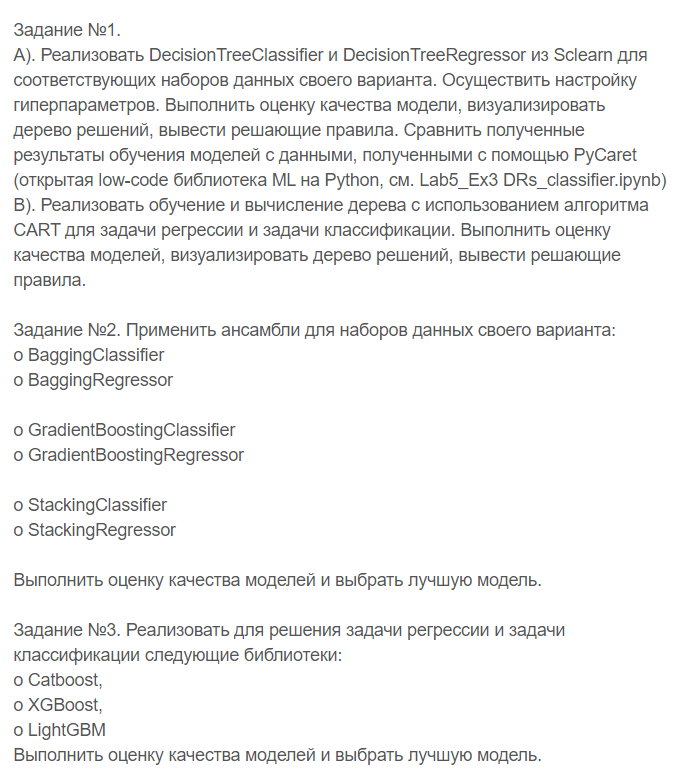

# Задание 1.А

## Предобработка как в 3 и 4 лабах

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from category_encoders.binary import BinaryEncoder

In [20]:
df_diab = pd.read_csv(r"..\data\Lab4\diabetes_012_health_indicators_BRFSS2015.csv")
df_cars = pd.read_csv(r"..\data\Lab3\Ex1\cars.csv")

In [21]:
# Сделаю предупреждение невидимым, вылезает при использовании кодировщика BinaryEncoder, в этой библиотеке используют метод iscathegorical вместо isinstance,
# что и вызывает предупреждение
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df_cars["engine_capacity"].fillna(0, inplace=True)

bin = BinaryEncoder()
binarized_categorical = bin.fit_transform(df_cars.select_dtypes(include="object")).astype("int8")
data = df_cars.select_dtypes(exclude="object")
df_cars = pd.concat([data, pd.DataFrame(binarized_categorical)], axis=1)
# d = bin.inverse_transform(df.iloc[:, 1:7]) так можно раскодировать, надо передать закодированные столбцы
df_cars

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,feature_0,...,body_type_1,body_type_2,body_type_3,state_0,state_1,drivetrain_0,drivetrain_1,location_region_0,location_region_1,location_region_2
0,190000,2010,False,2.5,False,10900.00,False,9,13,False,...,0,0,1,0,1,0,1,0,0,1
1,290000,2002,False,3.0,False,5000.00,True,12,54,False,...,0,0,1,0,1,0,1,0,0,1
2,402000,2001,False,2.5,False,2800.00,True,4,72,False,...,0,1,0,0,1,0,1,0,0,1
3,10000,1999,False,3.0,False,9999.00,True,9,42,True,...,0,1,1,0,1,0,1,0,0,1
4,280000,2001,False,2.5,False,2134.11,True,14,7,False,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,290000,2000,False,3.5,False,2750.00,True,5,85,False,...,0,1,1,0,1,1,0,0,0,1
38527,321000,2004,False,2.2,False,4800.00,True,4,20,False,...,1,0,0,0,1,1,0,0,1,1
38528,777957,2000,False,3.5,False,4300.00,False,3,63,False,...,0,1,1,0,1,1,0,0,0,1
38529,20000,2001,False,2.0,False,4000.00,True,7,156,False,...,1,1,0,0,1,1,0,0,1,1


In [22]:
y_cars = df_cars["price_usd"]
x_cars = df_cars.drop(["price_usd"], axis=1)

In [23]:
df_major_0 = df_diab[df_diab["Diabetes_012"] == 0]
df_major_2 = df_diab[df_diab["Diabetes_012"] == 2]
df_minor_1 = df_diab[df_diab["Diabetes_012"] == 1]

df_major_0_undersampled = df_major_0.sample(len(df_minor_1))
df_major_2_undersampled = df_major_2.sample(len(df_minor_1))

# Сбалансированный df
df_diab = pd.concat([df_major_0_undersampled, df_major_2_undersampled, df_minor_1], axis=0)

In [24]:
minmax = MinMaxScaler()
y_diab = df_diab["Diabetes_012"]

df_for_minmax = df_diab.drop(["Diabetes_012"], axis=1)
x_diab = pd.DataFrame(minmax.fit_transform(df_for_minmax), columns=list(df_diab.columns).remove("Diabetes_012"))

x_diab

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,0.0,1.0,0.333333,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.50,0.0,0.000000,0.0,0.0,0.500000,0.6,0.571429
1,0.0,0.0,1.0,0.190476,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.583333,0.8,1.000000
2,0.0,0.0,1.0,0.214286,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.75,0.0,0.700000,0.0,0.0,0.250000,1.0,0.714286
3,0.0,0.0,1.0,0.273810,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.50,0.0,0.000000,0.0,0.0,0.500000,0.6,0.571429
4,0.0,1.0,1.0,0.130952,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.1,0.000000,0.0,0.0,0.583333,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13888,1.0,0.0,1.0,0.261905,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.50,0.0,0.200000,0.0,0.0,0.250000,0.8,0.428571
13889,1.0,0.0,1.0,0.238095,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.25,0.0,0.066667,0.0,1.0,0.666667,1.0,0.857143
13890,0.0,0.0,1.0,0.142857,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.50,0.0,0.000000,0.0,0.0,0.750000,1.0,0.428571
13891,0.0,1.0,1.0,0.202381,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.50,0.0,0.000000,0.0,0.0,0.416667,1.0,0.428571


## Регрессор

In [25]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from math import sqrt

x_train_cars, x_test_cars, y_train_cars, y_test_cars = train_test_split(x_cars, y_cars, test_size=0.3)

In [26]:
param_grid = {
    "max_features": [7, 10, 15, 20, 25, 35, 45, 55, 59],  # Всего 59 столбцов
    "max_depth": np.arange(3, 8, 1)
}

dtr = DecisionTreeRegressor()
best_params = GridSearchCV(dtr, param_grid).fit(x_train_cars, y_train_cars).best_params_
best_params

{'max_depth': 7, 'max_features': 55}

In [27]:
dtr = DecisionTreeRegressor(**best_params)
y_pred_cars = dtr.fit(x_train_cars, y_train_cars).predict(x_test_cars)

print(f'MAE: {mean_absolute_error(y_test_cars, y_pred_cars)}')
print(f'MSE: {mean_squared_error(y_test_cars, y_pred_cars)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_cars, y_pred_cars))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test_cars, y_pred_cars)}')
print(f'R^2: {r2_score(y_test_cars, y_pred_cars)}')

MAE: 1587.0891314422995
MSE: 7008225.387370706
RMSE: 2647.305306792306
MAPE: 0.6351066012866008
R^2: 0.8369039290623553


In [28]:
print('Training set score: {:.4f}'.format(dtr.score(x_train_cars, y_train_cars)))
print('Test set score: {:.4f}'.format(dtr.score(x_test_cars, y_test_cars)))

Training set score: 0.8577
Test set score: 0.8369


Ура, модель не переобучилась!

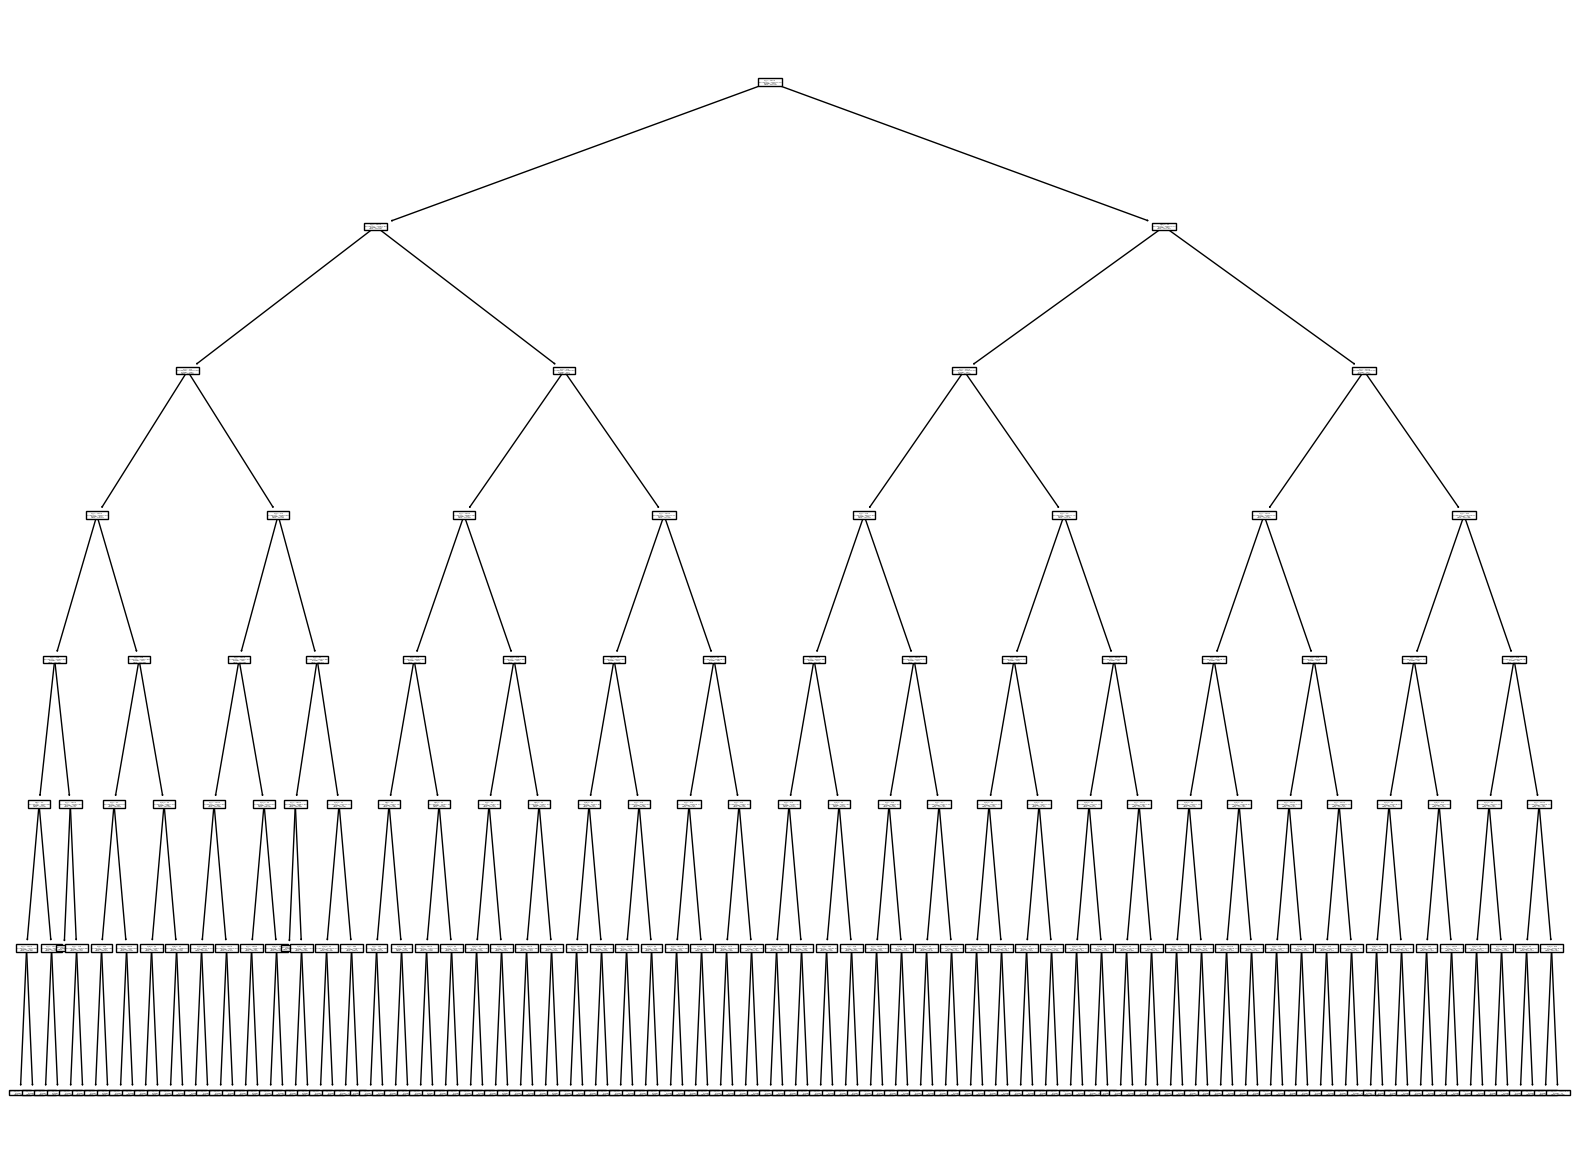

In [29]:
from matplotlib import pyplot as plt
from sklearn import tree

plt.figure(figsize=[20, 15])
annotation = tree.plot_tree(dtr)

In [30]:
print(tree.export_text(dtr))

|--- feature_1 <= 2006.50
|   |--- feature_1 <= 2000.50
|   |   |--- feature_3 <= 2.15
|   |   |   |--- feature_1 <= 1997.50
|   |   |   |   |--- feature_3 <= 1.85
|   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |--- feature_1 <= 1995.50
|   |   |   |   |   |   |   |--- value: [1279.72]
|   |   |   |   |   |   |--- feature_1 >  1995.50
|   |   |   |   |   |   |   |--- value: [1724.63]
|   |   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |   |--- feature_1 <= 1995.50
|   |   |   |   |   |   |   |--- value: [922.20]
|   |   |   |   |   |   |--- feature_1 >  1995.50
|   |   |   |   |   |   |   |--- value: [1270.92]
|   |   |   |   |--- feature_3 >  1.85
|   |   |   |   |   |--- feature_1 <= 1960.50
|   |   |   |   |   |   |--- value: [27000.00]
|   |   |   |   |   |--- feature_1 >  1960.50
|   |   |   |   |   |   |--- feature_3 <= 1.95
|   |   |   |   |   |   |   |--- value: [2360.30]
|   |   |   |   |   |   |--- feature_3 >  1.95
|   |   |   |   |   |   |   |

## Классификатор

In [31]:
from sklearn.metrics import classification_report

x_train_diab, x_test_diab, y_train_diab, y_test_diab = train_test_split(x_diab, y_diab, test_size=0.3)

In [32]:
dtc = DecisionTreeClassifier()
param_grid = {
    "max_depth": np.arange(1, 8, 1),
    "max_features": [10, 15, 17, 20]
}
best_params = GridSearchCV(dtc, param_grid).fit(x_train_diab, y_train_diab).best_params_
best_params

{'max_depth': 6, 'max_features': 10}

In [33]:
dtc = DecisionTreeClassifier(**best_params)
y_pred_diab = dtc.fit(x_train_diab, y_train_diab).predict(x_test_diab)

print(classification_report(y_test_diab, y_pred_diab))

              precision    recall  f1-score   support

         0.0       0.59      0.58      0.59      1406
         1.0       0.37      0.39      0.38      1369
         2.0       0.51      0.50      0.51      1393

    accuracy                           0.49      4168
   macro avg       0.49      0.49      0.49      4168
weighted avg       0.49      0.49      0.49      4168



In [34]:
print('Training set score: {:.4f}'.format(dtc.score(x_train_diab, y_train_diab)))
print('Test set score: {:.4f}'.format(dtc.score(x_test_diab, y_test_diab)))

Training set score: 0.5156
Test set score: 0.4906


И это дерево тоже не переобучилось, ура!

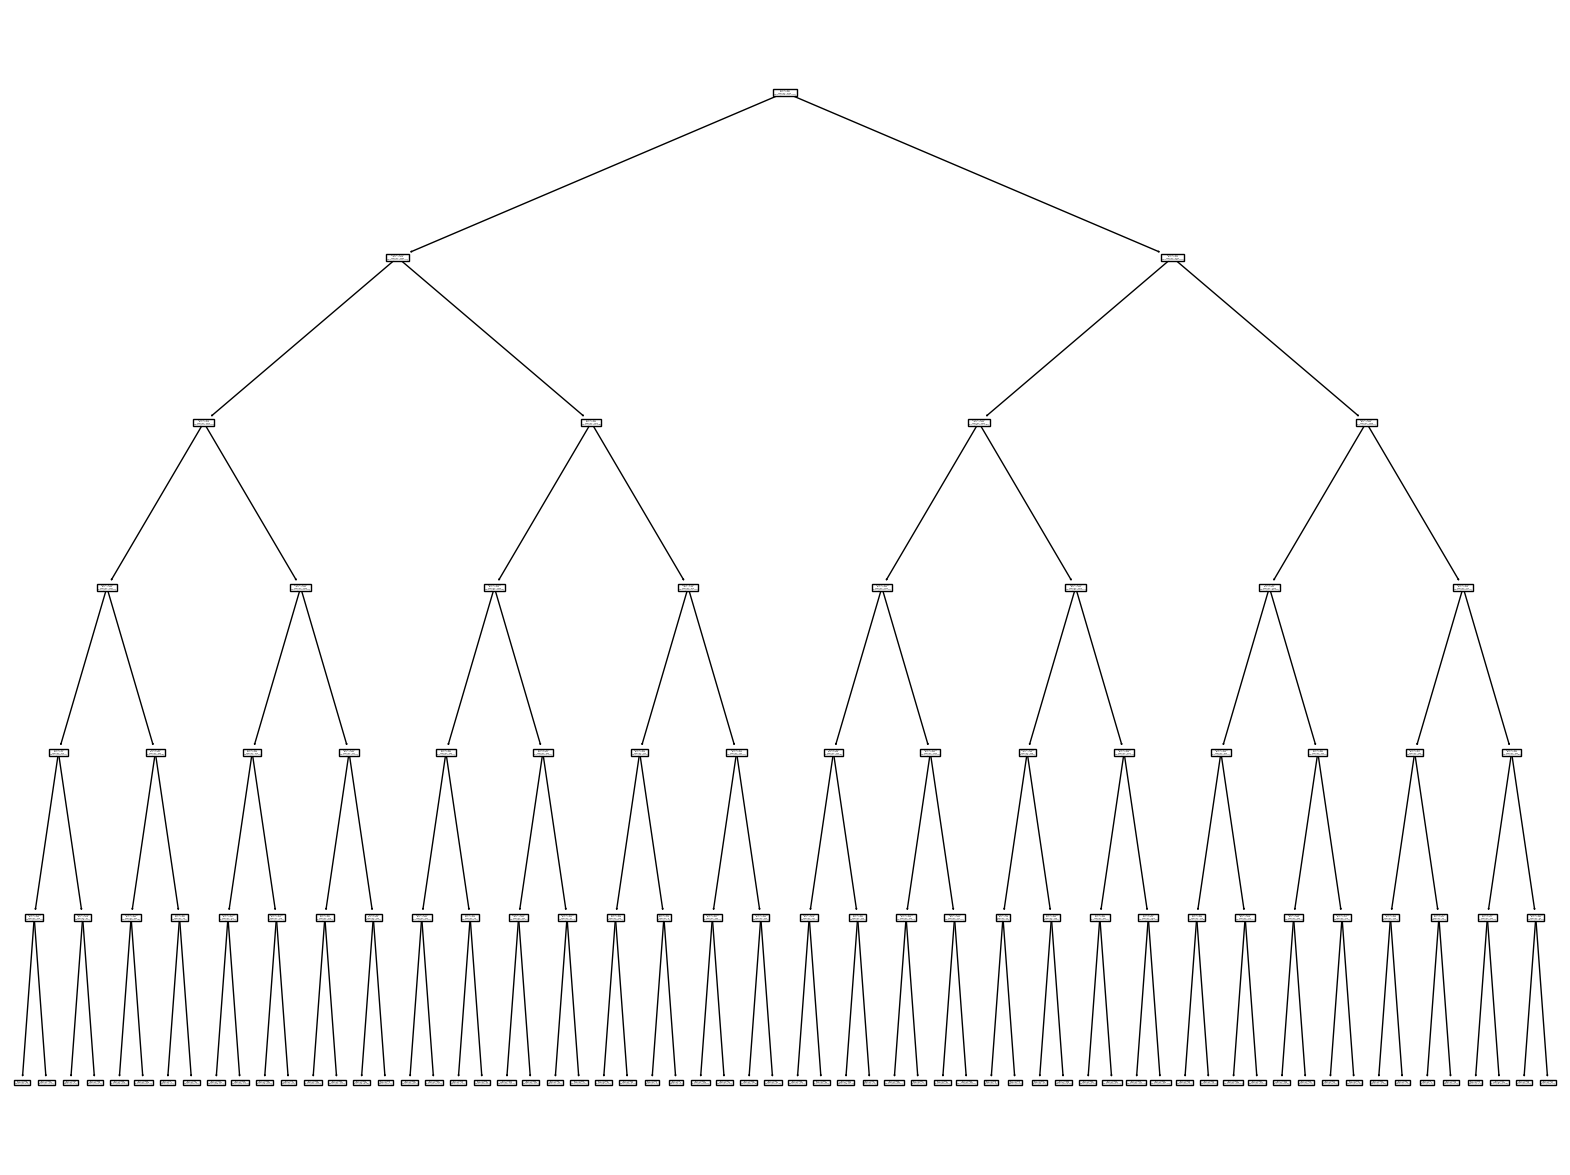

In [35]:
plt.figure(figsize=[20, 15])
annotation = tree.plot_tree(dtc)

In [36]:
print(tree.export_text(dtc))

|--- feature_0 <= 0.50
|   |--- feature_13 <= 0.38
|   |   |--- feature_19 <= 0.90
|   |   |   |--- feature_3 <= 0.15
|   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |--- feature_18 <= 0.46
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_18 >  0.46
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |--- feature_3 <= 0.10
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_3 >  0.10
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_3 >  0.15
|   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |--- feature_13 <= 0.12
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_13 >  0.12
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |--- feature_19

При дисбалансе классов метрики ~ 0.8 для мажоритарного класса 0 и очень близки к 0 для миноритарных классов

Выводы - регрессор справился очень хорошо, а классификатор средненько

## PyCaret classification

In [37]:
from pycaret.classification import *
from pycaret.regression import *

In [38]:
setup(data=df_diab, target='Diabetes_012', session_id=555, train_size=0.7)

,Description,Value
0,Session id,555
1,Target,Diabetes_012
2,Target type,Regression
3,Original data shape,"(13893, 22)"
4,Transformed data shape,"(13893, 22)"
5,Transformed train set shape,"(9725, 22)"
6,Transformed test set shape,"(4168, 22)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


In [39]:
dt = create_model(estimator='dt')
tuned_dt = tune_model(dt)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:40:24
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6490,0.9031,0.9503,-0.3380,0.5212,0.5008
1,0.7276,1.0293,1.0145,-0.5331,0.5612,0.5372
2,0.7194,1.0283,1.0140,-0.5275,0.5569,0.5434
3,0.6953,0.9890,0.9945,-0.4302,0.5437,0.4962
4,0.7461,1.0462,1.0229,-0.5818,0.5600,0.5408
5,0.7022,0.9859,0.9929,-0.5162,0.5442,0.5473
6,0.7382,1.0424,1.0210,-0.5438,0.5597,0.5251
7,0.7160,0.9871,0.9935,-0.5383,0.5447,0.5452
8,0.7124,1.0208,1.0104,-0.5334,0.5523,0.5264


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6049,0.5048,0.7105,0.2521,0.3998,0.3465
1,0.6513,0.5715,0.7560,0.1488,0.4208,0.3586
2,0.6278,0.5322,0.7295,0.2094,0.4094,0.3595
3,0.6247,0.5192,0.7206,0.2491,0.4000,0.3523
4,0.6410,0.5545,0.7446,0.1617,0.4175,0.3527
5,0.6133,0.5275,0.7263,0.1887,0.4055,0.3444
6,0.6338,0.5437,0.7374,0.1948,0.4072,0.3504
7,0.6140,0.5211,0.7219,0.1880,0.4084,0.3472
8,0.6267,0.5302,0.7282,0.2035,0.4171,0.3475


Fitting 10 folds for each of 10 candidates, totalling 100 fits


По метрикам acc, prec, rec, f1 результаты примерно такие же, как и у меня

## PyCaret Regression

In [40]:
setup(data=df_cars, target='price_usd', session_id=555, train_size=0.7)
dt = create_model(estimator='dt')
tuned_dt = tune_model(dt)

,Description,Value
0,Session id,555
1,Target,price_usd
2,Target type,Regression
3,Original data shape,"(38531, 59)"
4,Transformed data shape,"(38531, 59)"
5,Transformed train set shape,"(26971, 59)"
6,Transformed test set shape,"(11560, 59)"
7,Numeric features,45
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1549.7696,7329725.4337,2707.3466,0.8015,0.5322,1.0999
1,1626.6155,7876894.9168,2806.5806,0.7989,0.5060,1.6662
2,1584.2328,8050477.3493,2837.3363,0.7937,0.4784,0.5131
3,1591.4176,7750581.1060,2783.9865,0.8166,0.4803,0.3973
4,1601.9247,8712615.4834,2951.7140,0.7977,0.4823,0.5416
5,1583.1757,7997365.1687,2827.9613,0.8075,0.5027,1.9780
6,1571.5423,8132538.6958,2851.7606,0.8097,0.4739,0.3801
7,1639.1353,9353492.0300,3058.3479,0.7631,0.4940,0.3857
8,1608.4756,8528073.8582,2920.2866,0.7835,0.5374,0.9383


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1359.1818,5256246.7663,2292.6506,0.8576,0.4431,0.9423
1,1371.5280,5578009.3991,2361.7810,0.8576,0.4254,2.0589
2,1417.5742,6024427.1773,2454.4709,0.8457,0.4160,0.9105
3,1402.1950,5847624.0230,2418.1861,0.8616,0.4145,0.3834
4,1440.1682,6492459.0097,2548.0304,0.8493,0.4212,0.5633
5,1431.0534,6114369.6110,2472.7251,0.8528,0.4375,1.1862
6,1403.5163,6175226.5967,2485.0003,0.8555,0.3946,0.3185
7,1385.5137,6677500.8163,2584.0861,0.8309,0.4030,0.3351
8,1402.7879,6393985.2421,2528.6331,0.8377,0.4332,1.0666


Fitting 10 folds for each of 10 candidates, totalling 100 fits


Модель справилась так же, как и моя $=>$ я бесполезен((

# Задание 2. Ансамбли

In [41]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

## Bagging

Классификация

In [42]:
param_grid = {
    "estimator": [
            DecisionTreeClassifier(max_depth=4, max_features=20),
            GaussianNB(),
            LogisticRegression(max_iter=1000),
        ],
    "max_features": np.arange(5, 21, 3)
}

bc = BaggingClassifier()
best_params = GridSearchCV(bc, param_grid).fit(x_train_diab, y_train_diab).best_params_
best_params

{'estimator': LogisticRegression(max_iter=1000), 'max_features': 17}

In [43]:
bc = BaggingClassifier(**best_params)
bc.fit(x_train_diab, y_train_diab)
y_pred_diab = bc.predict(x_test_diab)
print(classification_report(y_test_diab, y_pred_diab))

              precision    recall  f1-score   support

         0.0       0.60      0.67      0.63      1406
         1.0       0.42      0.32      0.36      1369
         2.0       0.52      0.58      0.55      1393

    accuracy                           0.52      4168
   macro avg       0.51      0.52      0.51      4168
weighted avg       0.51      0.52      0.52      4168



Регрессия

In [44]:
param_grid = {
    "max_features": np.arange(20, 59, 3)
}

br = BaggingRegressor()
best_params = GridSearchCV(br, param_grid).fit(x_train_cars, y_train_cars).best_params_
best_params

{'max_features': 56}

In [45]:
br = BaggingRegressor(**best_params)
br.fit(x_train_cars, y_train_cars)
y_pred_cars = br.predict(x_test_cars)

print(f'MAE: {mean_absolute_error(y_test_cars, y_pred_cars)}')
print(f'MSE: {mean_squared_error(y_test_cars, y_pred_cars)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_cars, y_pred_cars))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test_cars, y_pred_cars)}')
print(f'R^2: {r2_score(y_test_cars, y_pred_cars)}')

MAE: 1223.4627359652006
MSE: 4440164.135266902
RMSE: 2107.169697785848
MAPE: 0.4204157450713325
R^2: 0.8966680886026746


Ансамбль Bagging в данном случае справился примерно так же, как и одиночные модели решающих деревьев

## GradientBoosting

Классификация

In [46]:
gbc = GradientBoostingClassifier(max_depth=5, max_features=20).fit(x_train_diab, y_train_diab)
y_pred_diab = gbc.predict(x_test_diab)

print(classification_report(y_test_diab, y_pred_diab))

              precision    recall  f1-score   support

         0.0       0.63      0.60      0.62      1406
         1.0       0.41      0.39      0.40      1369
         2.0       0.51      0.55      0.52      1393

    accuracy                           0.52      4168
   macro avg       0.51      0.51      0.51      4168
weighted avg       0.52      0.52      0.51      4168



Регрессия

In [47]:
gbr = GradientBoostingRegressor(max_depth=5, max_features=59).fit(x_train_cars, y_train_cars)
y_pred_cars = gbr.predict(x_test_cars)

print(f'MAE: {mean_absolute_error(y_test_cars, y_pred_cars)}')
print(f'MSE: {mean_squared_error(y_test_cars, y_pred_cars)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_cars, y_pred_cars))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test_cars, y_pred_cars)}')
print(f'R^2: {r2_score(y_test_cars, y_pred_cars)}')

MAE: 1199.692020130989
MSE: 3966336.497509932
RMSE: 1991.566342733762
MAPE: 0.45154342812981485
R^2: 0.9076950493164511


## Stacking

Классификация

In [48]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

estimators = [
    ("dt", DecisionTreeClassifier(max_depth=7, max_features=20)),
    ("logreg", LogisticRegression(max_iter=800)),
    ("bayes", GaussianNB()),
    ("svm", SVC()),
    ("knn", KNeighborsClassifier(n_neighbors=80)),
]

sc = StackingClassifier(estimators, final_estimator=DecisionTreeClassifier(max_depth=5)).fit(x_train_diab, y_train_diab)
y_pred_diab = sc.predict(x_test_diab)
print(classification_report(y_test_diab, y_pred_diab))

              precision    recall  f1-score   support

         0.0       0.67      0.54      0.60      1406
         1.0       0.39      0.51      0.45      1369
         2.0       0.54      0.48      0.51      1393

    accuracy                           0.51      4168
   macro avg       0.53      0.51      0.52      4168
weighted avg       0.54      0.51      0.52      4168



Регрессия

In [49]:
from sklearn.linear_model import Ridge

estimators = [
    ("lr", Ridge(alpha=0.1)),
    ("dt", DecisionTreeRegressor(max_depth=7, max_features=59)),
]

sr = StackingRegressor(estimators, final_estimator=DecisionTreeRegressor(max_depth=5)).fit(x_train_cars, y_train_cars)
y_pred_diab = sr.predict(x_test_cars)

print(f'MAE: {mean_absolute_error(y_test_cars, y_pred_cars)}')
print(f'MSE: {mean_squared_error(y_test_cars, y_pred_cars)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_cars, y_pred_cars))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test_cars, y_pred_cars)}')
print(f'R^2: {r2_score(y_test_cars, y_pred_cars)}')

MAE: 1199.692020130989
MSE: 3966336.497509932
RMSE: 1991.566342733762
MAPE: 0.45154342812981485
R^2: 0.9076950493164511


Выводы - ансамбли справились чуть лучше одиночных моделей, бустинг незначительно превзошёл другие ансамблевые модели

# Задание 3

## CatBoost

In [50]:
from catboost import CatBoostClassifier, CatBoostRegressor

cbc = CatBoostClassifier(loss_function="MultiClassOneVsAll")
grid = {'learning_rate': [0.03, 0.06],
        'depth': [2, 3, 4],
        'l2_leaf_reg': [1, 3, 5]}

grid_search_result = cbc.grid_search(grid, X=x_train_diab, y=y_train_diab, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6880974	test: 0.6881132	best: 0.6881132 (0)	total: 140ms	remaining: 2m 19s
1:	learn: 0.6832728	test: 0.6833170	best: 0.6833170 (1)	total: 143ms	remaining: 1m 11s
2:	learn: 0.6786301	test: 0.6784090	best: 0.6784090 (2)	total: 146ms	remaining: 48.4s
3:	learn: 0.6746141	test: 0.6742755	best: 0.6742755 (3)	total: 148ms	remaining: 36.9s
4:	learn: 0.6704153	test: 0.6701543	best: 0.6701543 (4)	total: 151ms	remaining: 30s
5:	learn: 0.6662743	test: 0.6658933	best: 0.6658933 (5)	total: 153ms	remaining: 25.4s
6:	learn: 0.6625569	test: 0.6620486	best: 0.6620486 (6)	total: 155ms	remaining: 22s
7:	learn: 0.6592129	test: 0.6585853	best: 0.6585853 (7)	total: 161ms	remaining: 19.9s
8:	learn: 0.6560351	test: 0.6553011	best: 0.6553011 (8)	total: 164ms	remaining: 18s
9:	learn: 0.6528083	test: 0.6520996	best: 0.6520996 (9)	total: 166ms	remaining: 16.5s
10:	learn: 0.6497450	test: 0.6490559	best: 0.6490559 (10)	total: 169ms	remaining: 15.2s
11:	learn: 0.6468294	test: 0.6460282	best: 0.6460282 (11

In [51]:
grid_search_result["params"]

{'depth': 4, 'l2_leaf_reg': 1, 'learning_rate': 0.03}

In [52]:
cbc = CatBoostClassifier(depth=4, l2_leaf_reg=1, learning_rate=0.03)
cbc.fit(x_train_diab, y_train_diab, plot=True, logging_level="Silent")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [53]:
y_pred_diab = cbc.predict(x_test_diab)
print(classification_report(y_test_diab, y_pred_diab))

              precision    recall  f1-score   support

         0.0       0.63      0.63      0.63      1406
         1.0       0.42      0.39      0.41      1369
         2.0       0.52      0.56      0.54      1393

    accuracy                           0.53      4168
   macro avg       0.53      0.53      0.53      4168
weighted avg       0.53      0.53      0.53      4168



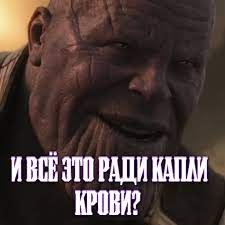

In [54]:
cbr = CatBoostRegressor().fit(x_train_cars, y_train_cars, logging_level="Silent")
y_pred_cars = cbr.predict(x_test_cars)

print(f'MAE: {mean_absolute_error(y_test_cars, y_pred_cars)}')
print(f'MSE: {mean_squared_error(y_test_cars, y_pred_cars)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_cars, y_pred_cars))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test_cars, y_pred_cars)}')
print(f'R^2: {r2_score(y_test_cars, y_pred_cars)}')

MAE: 1029.6993893072306
MSE: 2948346.083673176
RMSE: 1717.0748625709875
MAPE: 0.39214805844403405
R^2: 0.9313858166037245


## XGBoost

In [55]:
from xgboost import XGBClassifier, XGBRegressor

y_pred_diab = XGBClassifier().fit(x_train_diab, y_train_diab).predict(x_test_diab)
print(classification_report(y_test_diab, y_pred_diab))

              precision    recall  f1-score   support

         0.0       0.62      0.60      0.61      1406
         1.0       0.41      0.40      0.40      1369
         2.0       0.49      0.51      0.50      1393

    accuracy                           0.50      4168
   macro avg       0.50      0.50      0.50      4168
weighted avg       0.50      0.50      0.50      4168



In [56]:
y_pred_cars = XGBRegressor().fit(x_train_cars, y_train_cars).predict(x_test_cars)

print(f'MAE: {mean_absolute_error(y_test_cars, y_pred_cars)}')
print(f'MSE: {mean_squared_error(y_test_cars, y_pred_cars)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_cars, y_pred_cars))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test_cars, y_pred_cars)}')
print(f'R^2: {r2_score(y_test_cars, y_pred_cars)}')

MAE: 1102.5835069873606
MSE: 3348483.9513671836
RMSE: 1829.886321979369
MAPE: 0.46308992773755137
R^2: 0.9220737710505287


Всё сработало круто

## LightGBM

In [57]:
from lightgbm import LGBMClassifier, LGBMRegressor

y_pred_diab = np.array(LGBMClassifier().fit(x_train_diab, y_train_diab).predict(x_test_diab))
print()
print(classification_report(y_test_diab, y_pred_diab))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 9725, number of used features: 21
[LightGBM] [Info] Start training from score -1.103767
[LightGBM] [Info] Start training from score -1.092359
[LightGBM] [Info] Start training from score -1.099744

              precision    recall  f1-score   support

         0.0       0.64      0.60      0.62      1406
         1.0       0.41      0.40      0.40      1369
         2.0       0.50      0.55      0.53      1393

    accuracy                           0.52      4168
   macro avg       0.52      0.52      0.52      4168
weighted avg       0.52      0.52      0.52      4168



In [58]:
y_pred_cars = np.array(LGBMRegressor().fit(x_train_cars, y_train_cars).predict(x_test_cars))
print()

print(f'MAE: {mean_absolute_error(y_test_cars, y_pred_cars)}')
print(f'MSE: {mean_squared_error(y_test_cars, y_pred_cars)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_cars, y_pred_cars))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test_cars, y_pred_cars)}')
print(f'R^2: {r2_score(y_test_cars, y_pred_cars)}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1027
[LightGBM] [Info] Number of data points in the train set: 26971, number of used features: 58
[LightGBM] [Info] Start training from score 6599.161401

MAE: 1127.982134348283
MSE: 3445374.177162849
RMSE: 1856.17191476513
MAPE: 0.44867055639701153
R^2: 0.9198189327332549


Вывод - все эти библиотеки справились примерно одинаково хорошо

# Задание 1.В aka CART

In [110]:
class Node:
    def __init__(
        self,
        threshold,
        feature,
        left_child,
        right_child
    ):
        self.threshold = threshold
        self.feature = feature
        self.left_child = left_child
        self.right_child = right_child


class Leaf:
    def __init__(self, value):
        self.value = value

In [162]:
from typing import Literal
from scipy.stats import mode

class CARTModel:
    def __init__(
            self,
            max_depth: int,
            criterion: Literal["gini", "mse"],
            min_samples_split: int = 2,
        ) -> None:

        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        if criterion == "mse":
            self.loss_func = self._mse
        elif criterion == "gini":
            self.loss_func = self._gini_impurity
        self.criterion = criterion
        self.root = None

    def fit(self, X_train, y_train):
        self.root = self._build_tree(X_train, y_train, depth=0)

    def predict(self, x_test):
        return np.array([self._bypass_tree(x, self.root) for x in x_test])

    def _gini_impurity(self, left_y, right_y) -> float:
        left_gini = 1 - np.sum((np.bincount(left_y) / len(left_y))**2)  # 1 - cумма(вероятность ** 2)
        right_gini = 1 - np.sum((np.bincount(right_y) / len(right_y))**2)
        gini_impurity = (len(left_y) * left_gini + len(right_y) * right_gini) / (len(left_y) + len(right_y))  # len(left_y) и len(right_y) - веса для левой и правой ветки
        return float(gini_impurity)
    
    def _mse(self, left_y, right_y) -> float:
        left_mse = np.mean((left_y - np.mean(left_y))**2)  # рассчитываются отклонения от среднего в пределах одной вершины
        right_mse = np.mean((right_y - np.mean(right_y))**2)
        mse = (len(left_y) * left_mse + len(right_y) * right_mse) / (len(left_y) + len(right_y))  # взвешенная метрика. len - веса для левой и правой части
        return mse


    def _find_best_split(self, X, y):
        best_metric_value = float('inf')  # Хотим сделать как можно меньше (и gini, и mse)
        best_feature = None
        best_threshold = None
        
        for column in range(X.shape[1]):  # Идём по столбцам и выбираем уникальные значения в каждом столбце
            thresholds = np.unique(X[:, column])
            
            for threshold in thresholds:  # Идём по возможным порогам и выбираем самый крутой
                left_indices = X[:, column] <= threshold  # Вектор булевых штук длины m
                right_indices = X[:, column] > threshold
                
                loss_func_value = self.loss_func(y[left_indices].astype(int), y[right_indices].astype(int))

                if loss_func_value < best_metric_value:
                    best_metric_value = loss_func_value
                    best_feature = column
                    best_threshold = threshold
        
        return best_feature, best_threshold


    def _build_tree(self, X, y, depth) -> Node | Leaf:
        if depth >= self.max_depth or len(X) <= self.min_samples_split:  # Если глубина больше заданной или в вершине меньше наблюдений, чем min_samples_split, то останавливаемся
            if self.loss_func == self._mse:                              # и делаем листик
                return Leaf(value=np.mean(y))   
            if self.loss_func == self._gini_impurity:
                return Leaf(value=mode(y)[0])
        
        best_feature, best_threshold = self._find_best_split(X, y)

        left_child_indices = X[:, best_feature] <= best_threshold  # Вектор булевых штук
        right_child_indices = X[:, best_feature] > best_threshold
        
        # Рекурсивно плодим вершины
        node = Node(
            feature = best_feature,
            threshold = best_threshold,
            left_child = self._build_tree(X[left_child_indices], y[left_child_indices], depth + 1),  # увеличиваем глубину, пока не упрёмся в максимальную.
            right_child = self._build_tree(X[right_child_indices], y[right_child_indices], depth + 1)
        )
        return node
    

    def _bypass_tree(self, x, node):
        if type(node) == Leaf:
            return node.value

        elif x[node.feature] <= node.threshold:  # движение по левому поддереву
            return self._bypass_tree(x, node.left_child)
        
        else:                                    # Движение по правому поддереву
            return self._bypass_tree(x, node.right_child) 

In [163]:
Xreg = np.array(df_cars.drop(["price_usd"], axis=1))[:3000]
yreg = np.array(df_cars['price_usd'])[:3000]

In [164]:
X_train, X_test, y_train, y_test = train_test_split(Xreg, yreg, test_size=0.2)

In [165]:
cart_dtr = CARTModel(max_depth=10, min_samples_split=10, criterion="mse")
cart_dtr.fit(X_train, y_train)

y_pred = cart_dtr.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {r2_score(y_test, y_pred)}')

MAE: 1172.5671480308804
MSE: 3360522.534313244
RMSE: 1833.1728053604886
MAPE: 0.3000614431558022
R^2: 0.8662914222901981


In [195]:
Xclass = np.array(df_diab.drop(["Diabetes_012"], axis=1))
yclass = np.array(df_diab['Diabetes_012'])

In [196]:
X_train, X_test, y_train, y_test = train_test_split(Xclass, yclass, test_size=0.2)

In [197]:
cart_dtc = CARTModel(max_depth=10, min_samples_split=10, criterion="gini")
cart_dtc.fit(X_train, y_train)

y_pred = cart_dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.59      0.60       963
         1.0       0.40      0.34      0.37       906
         2.0       0.47      0.55      0.51       910

    accuracy                           0.50      2779
   macro avg       0.49      0.49      0.49      2779
weighted avg       0.49      0.50      0.49      2779



In [198]:
left_y = [1, 1, 1, 0, 0, 2, 2, 2, 2]

gini = 1 - np.sum((np.bincount(left_y) / len(left_y))**2)
print((np.bincount(left_y) / len(left_y)) ** 2)

[0.04938272 0.11111111 0.19753086]


In [199]:
X = np.array(left_y).reshape(3, 3)
threshold = 1
left_indices = X[:, 1] <= threshold
print(X)
print(left_indices)

[[1 1 1]
 [0 0 2]
 [2 2 2]]
[ True  True False]


In [200]:
node = Leaf(1)
type(node) == Leaf

True